In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data_path = "data/Chicago_Crimes_2012_to_2017.csv"

In [3]:
df = pd.read_csv(
    data_path,
    low_memory=False,
)

In [8]:
df['Date'] = pd.to_datetime(
    df['Date'].str.strip(),              # buang spasi
    format='%m/%d/%Y %I:%M:%S %p',       # contoh: 05/03/2016 11:40:00 PM
    errors='coerce'
)

In [9]:
df['Updated On'] = pd.to_datetime(
    df['Updated On'].str.strip(),
    format='%m/%d/%Y %I:%M:%S %p',
    errors='coerce'
)

# Exploratory Data Analysis

### Cek Struktur & Tipe Data

In [10]:
print("Shape dataset:", df.shape)

Shape dataset: (1456714, 23)


In [11]:
display(df.head())

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,3,10508693,HZ250496,2016-05-03 23:40:00,013XX S SAWYER AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,...,24.0,29.0,08B,1154907.0,1893681.0,2016,2016-05-10 15:56:50,41.864073,-87.706819,"(41.864073157, -87.706818608)"
1,89,10508695,HZ250409,2016-05-03 21:40:00,061XX S DREXEL AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,...,20.0,42.0,08B,1183066.0,1864330.0,2016,2016-05-10 15:56:50,41.782922,-87.604363,"(41.782921527, -87.60436317)"
2,197,10508697,HZ250503,2016-05-03 23:31:00,053XX W CHICAGO AVE,0470,PUBLIC PEACE VIOLATION,RECKLESS CONDUCT,STREET,False,...,37.0,25.0,24,1140789.0,1904819.0,2016,2016-05-10 15:56:50,41.894908,-87.758372,"(41.894908283, -87.758371958)"
3,673,10508698,HZ250424,2016-05-03 22:10:00,049XX W FULTON ST,0460,BATTERY,SIMPLE,SIDEWALK,False,...,28.0,25.0,08B,1143223.0,1901475.0,2016,2016-05-10 15:56:50,41.885687,-87.749516,"(41.885686845, -87.749515983)"
4,911,10508699,HZ250455,2016-05-03 22:00:00,003XX N LOTUS AVE,0820,THEFT,$500 AND UNDER,RESIDENCE,False,...,28.0,25.0,06,1139890.0,1901675.0,2016,2016-05-10 15:56:50,41.886297,-87.761751,"(41.886297242, -87.761750709)"


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1456714 entries, 0 to 1456713
Data columns (total 23 columns):
 #   Column                Non-Null Count    Dtype         
---  ------                --------------    -----         
 0   Unnamed: 0            1456714 non-null  int64         
 1   ID                    1456714 non-null  int64         
 2   Case Number           1456713 non-null  object        
 3   Date                  1456714 non-null  datetime64[ns]
 4   Block                 1456714 non-null  object        
 5   IUCR                  1456714 non-null  object        
 6   Primary Type          1456714 non-null  object        
 7   Description           1456714 non-null  object        
 8   Location Description  1455056 non-null  object        
 9   Arrest                1456714 non-null  bool          
 10  Domestic              1456714 non-null  bool          
 11  Beat                  1456714 non-null  int64         
 12  District              1456713 non-null  fl

In [13]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
Unnamed: 0,1456714.0,3308606.043058,3.0,2698636.25,3063653.5,3428848.75,6253474.0,1235349.939185
ID,1456714.0,9597549.913364,20224.0,9002709.25,9605775.5,10225766.5,10827880.0,808350.47531
Date,1456714,2014-05-25 12:29:17.033580032,2012-01-01 00:00:00,2013-02-05 10:30:00,2014-05-04 23:55:00,2015-09-01 02:57:30,2017-01-18 23:49:00,NaN
Beat,1456714.0,1150.644056,111.0,613.0,1024.0,1711.0,2535.0,691.646593
District,1456713.0,11.259201,1.0,6.0,10.0,17.0,31.0,6.904691
Ward,1456700.0,22.870273,1.0,10.0,23.0,34.0,50.0,13.80589
Community Area,1456674.0,37.456321,0.0,23.0,32.0,56.0,77.0,21.440286
X Coordinate,1419631.0,1164397.912871,0.0,1152544.0,1166021.0,1176363.0,1205119.0,18508.347217
Y Coordinate,1419631.0,1885523.190194,0.0,1858762.0,1891502.0,1908713.0,1951573.0,34247.750361
Year,1456714.0,2013.896992,2012.0,2013.0,2014.0,2015.0,2017.0,1.449584


### Analisis Target Arrest

Jumlah masing-masing kelas:
 Arrest
False    1079242
True      377472
Name: count, dtype: int64

Persentase masing-masing kelas (%):
 Arrest
False    74.09
True     25.91
Name: proportion, dtype: float64


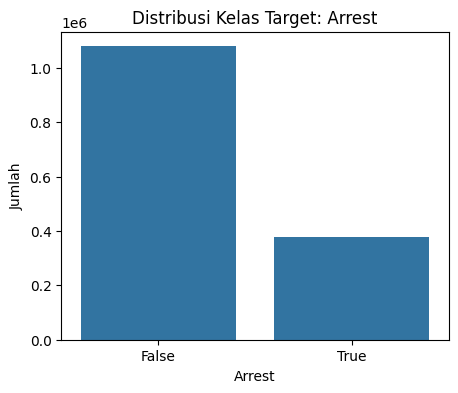

In [14]:
# Pastikan kolom target ada
if 'Arrest' in df.columns:
    # Hitung distribusi absolut
    arrest_counts = df['Arrest'].value_counts()
    print("Jumlah masing-masing kelas:\n", arrest_counts)

    # Hitung persentase
    arrest_percent = df['Arrest'].value_counts(normalize=True) * 100
    print("\nPersentase masing-masing kelas (%):\n", arrest_percent.round(2))

    # Visualisasi distribusi kelas
    plt.figure(figsize=(5,4))
    sns.countplot(x='Arrest', data=df)
    plt.title('Distribusi Kelas Target: Arrest')
    plt.xlabel('Arrest')
    plt.ylabel('Jumlah')
    plt.show()
else:
    print("Kolom 'Arrest' tidak ditemukan di dataset.")


### Cek Missing Values

In [15]:
missing_count = df.isnull().sum()
missing_percent = (missing_count / len(df)) * 100

missing_df = pd.DataFrame({
    'missing_count': missing_count,
    'missing_percent': missing_percent
}).sort_values(by='missing_percent', ascending=False)

print("Missing values per kolom:")
display(missing_df.head(20))

Missing values per kolom:


,missing_count,missing_percent
Y Coordinate,37083,2.545661
Longitude,37083,2.545661
X Coordinate,37083,2.545661
Location,37083,2.545661
Latitude,37083,2.545661
Location Description,1658,0.113818
Community Area,40,0.002746
Ward,14,0.000961
District,1,0.000069
Case Number,1,0.000069


In [16]:
missing_nonzero = missing_df[missing_df['missing_count'] > 0]

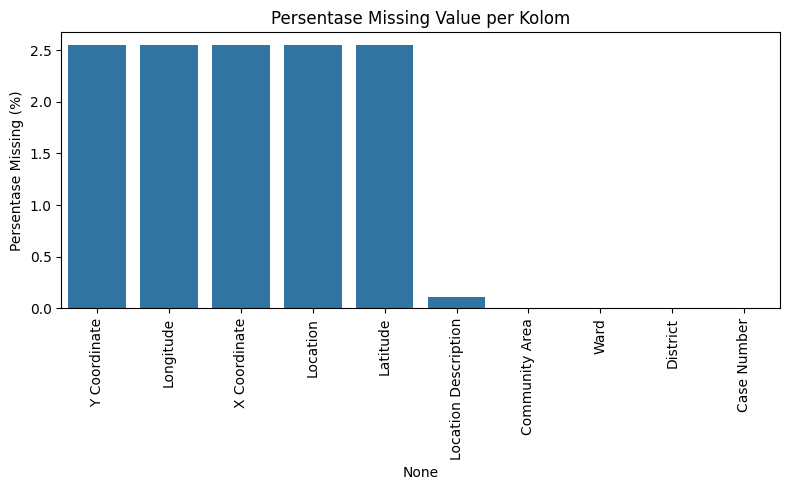

In [17]:
plt.figure(figsize=(8,5))
sns.barplot(
    x=missing_nonzero.index,
    y='missing_percent',
    data=missing_nonzero
)
plt.xticks(rotation=90)
plt.ylabel('Persentase Missing (%)')
plt.title('Persentase Missing Value per Kolom')
plt.tight_layout()
plt.show()

### Fitur Numerik (Distribusi & Outliers)

In [18]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
print("Fitur numerik:", list(numeric_cols))

Fitur numerik: ['Unnamed: 0', 'ID', 'Beat', 'District', 'Ward', 'Community Area', 'X Coordinate', 'Y Coordinate', 'Year', 'Latitude', 'Longitude']


##### Histogram

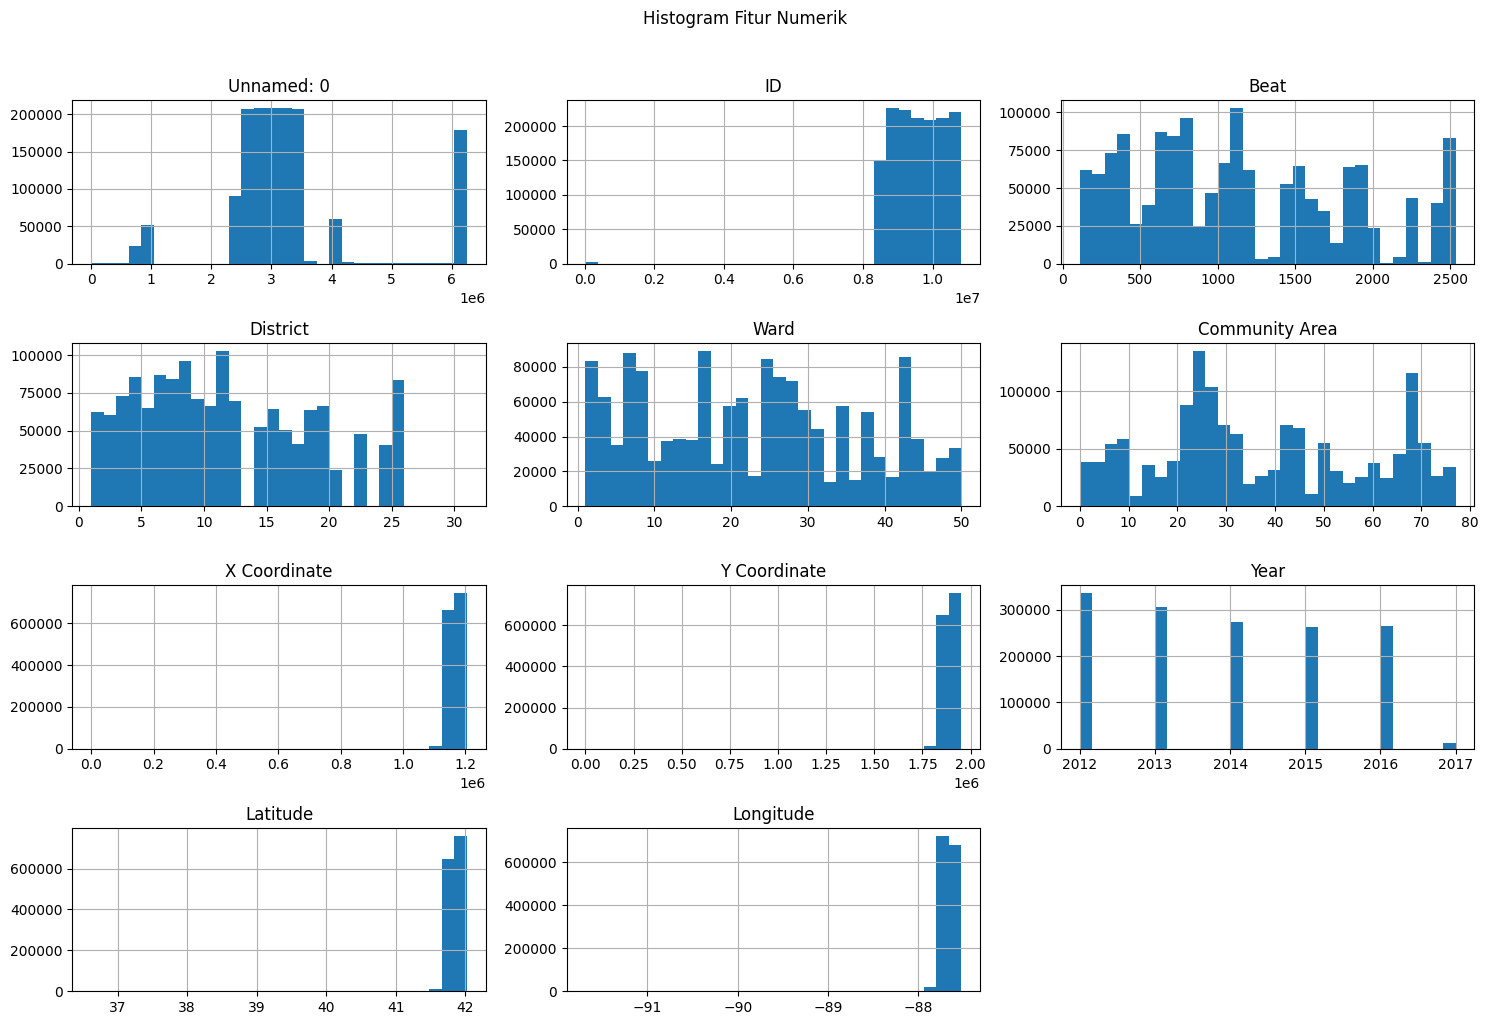

In [23]:
df[numeric_cols].hist(bins=30, figsize=(15, 10))
plt.suptitle('Histogram Fitur Numerik', y=1.02)
plt.tight_layout()
plt.show()

##### Boxplot

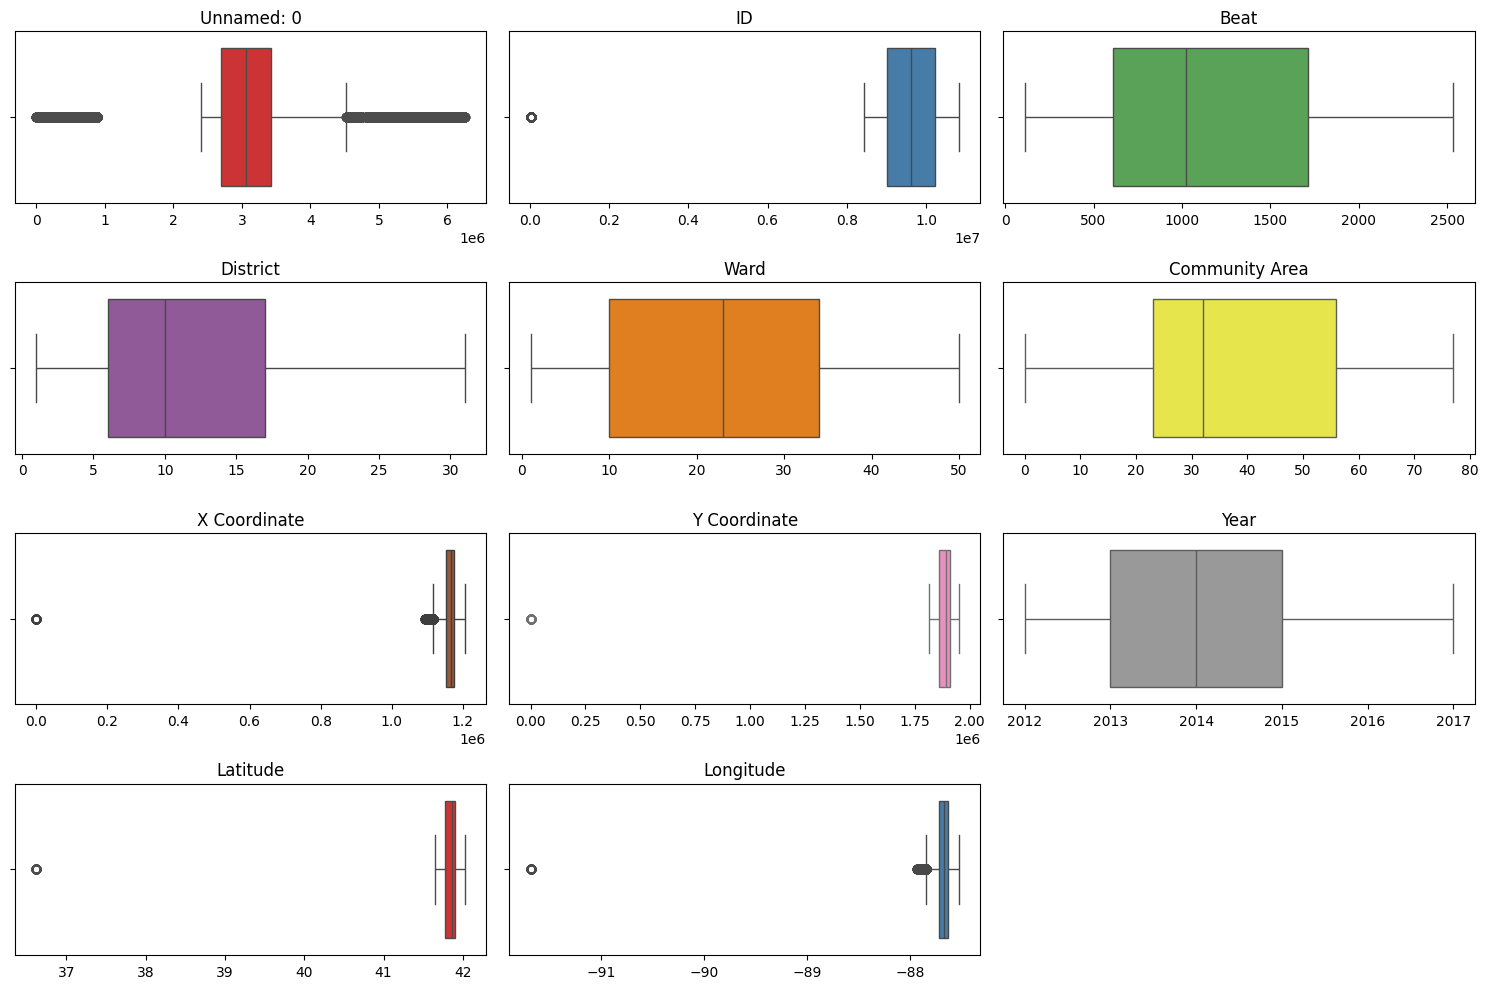

In [21]:
color_palette = sns.color_palette("Set1", len(numeric_cols))
plt.figure(figsize = (15, 10))

for i, column in enumerate(numeric_cols, 1):
    plt.subplot((len(numeric_cols)//3)+1, 3, i)
    sns.boxplot(data=df, x=column, color=color_palette[i - 1])    
    plt.xlabel('')
    plt.ylabel('')
    plt.title(f'{column}')

plt.tight_layout()
plt.show()

### Fitur Kategorikal

In [24]:
cat_cols = df.select_dtypes(include=['object', 'category']).columns
print("Fitur kategorikal:", list(cat_cols))

Fitur kategorikal: ['Case Number', 'Block', 'IUCR', 'Primary Type', 'Description', 'Location Description', 'FBI Code', 'Location']


Top 10 Primary Type:
 Primary Type
THEFT                  329460
BATTERY                263700
CRIMINAL DAMAGE        155455
NARCOTICS              135240
ASSAULT                 91289
OTHER OFFENSE           87874
BURGLARY                83397
DECEPTIVE PRACTICE      75495
MOTOR VEHICLE THEFT     61138
ROBBERY                 57313
Name: count, dtype: int64


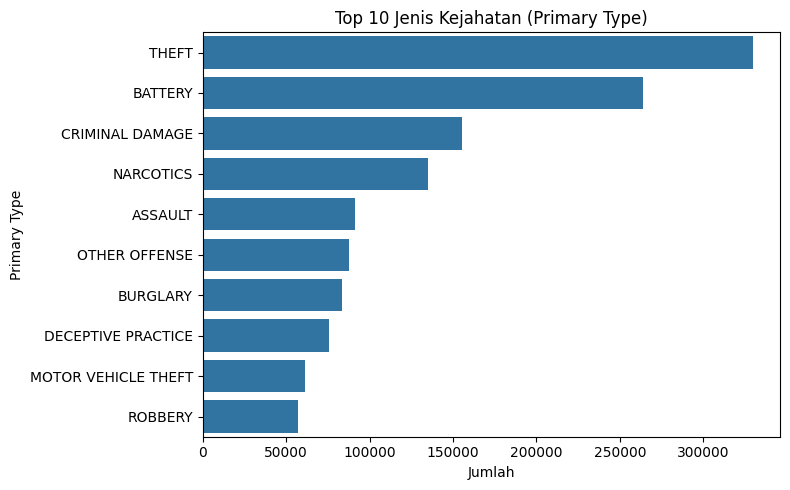

In [27]:
primary_counts = df['Primary Type'].value_counts().head(10)
print("Top 10 Primary Type:\n", primary_counts)

plt.figure(figsize=(8,5))
sns.barplot(
x=primary_counts.values,
y=primary_counts.index
)
plt.title('Top 10 Jenis Kejahatan (Primary Type)')
plt.xlabel('Jumlah')
plt.ylabel('Primary Type')
plt.tight_layout()
plt.show()

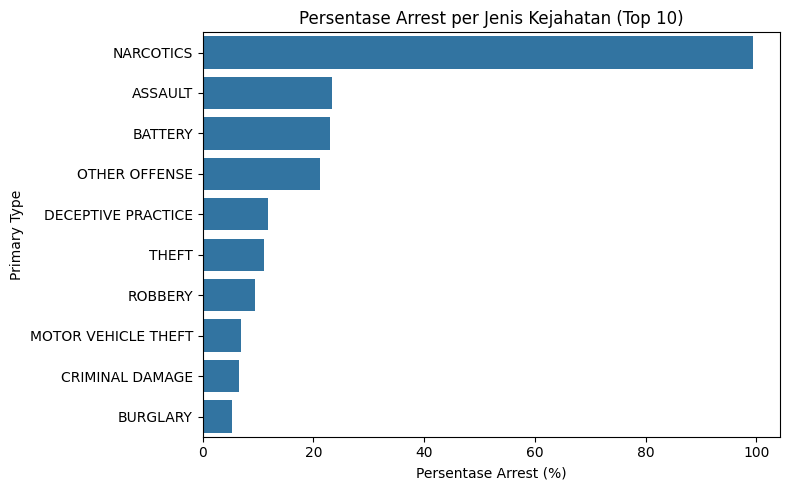

In [28]:
top_types = primary_counts.index
tmp = df[df['Primary Type'].isin(top_types)].copy()

arrest_by_type = (
    tmp.groupby('Primary Type')['Arrest']
    .mean()
    .sort_values(ascending=False)
) * 100  # jadi persen

plt.figure(figsize=(8,5))
sns.barplot(
    x=arrest_by_type.values,
    y=arrest_by_type.index
)
plt.title('Persentase Arrest per Jenis Kejahatan (Top 10)')
plt.xlabel('Persentase Arrest (%)')
plt.ylabel('Primary Type')
plt.tight_layout()
plt.show()

In [29]:
for col in ['Location Description', 'District']:
    if col in df.columns:
        print(f"\nTop kategori untuk {col}:")
        display(df[col].value_counts().head(10))


Top kategori untuk Location Description:


Location Description
STREET                            330471
RESIDENCE                         233530
APARTMENT                         185023
SIDEWALK                          160891
OTHER                              55774
PARKING LOT/GARAGE(NON.RESID.)     41768
ALLEY                              31771
RESIDENTIAL YARD (FRONT/BACK)      30645
SMALL RETAIL STORE                 28803
SCHOOL, PUBLIC, BUILDING           25959
Name: count, dtype: int64


Top kategori untuk District:


District
11.0    102878
8.0      96325
6.0      86915
4.0      85681
7.0      84373
25.0     83204
3.0      73195
9.0      70869
12.0     69482
10.0     66276
Name: count, dtype: int64

### Analisis Temporal (Waktu)

In [30]:
print(df['Date'].dtype)

datetime64[ns]


In [31]:
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df['Hour'] = df['Date'].dt.hour
df['DayOfWeek'] = df['Date'].dt.dayofweek

In [32]:
df['IsWeekend'] = df['DayOfWeek'].isin([5, 6])  # Sabtu/Minggu
df['IsNight'] = df['Hour'].isin(list(range(0,6)) + list(range(22,24)))  # jam 22–05

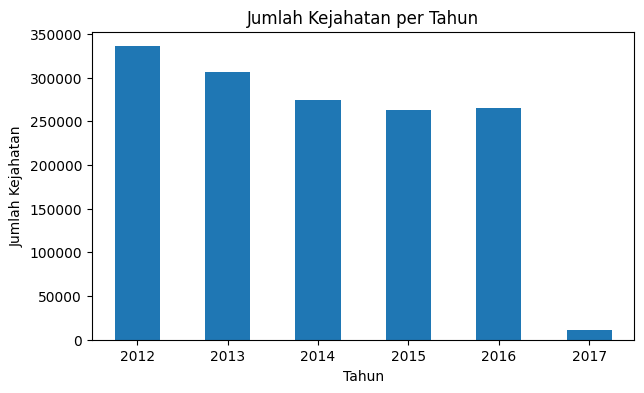

In [36]:
plt.figure(figsize=(7,4))
df.groupby('Year').size().plot(kind='bar')
plt.title('Jumlah Kejahatan per Tahun')
plt.xlabel('Tahun')
plt.ylabel('Jumlah Kejahatan')
plt.xticks(rotation=0)
plt.show()

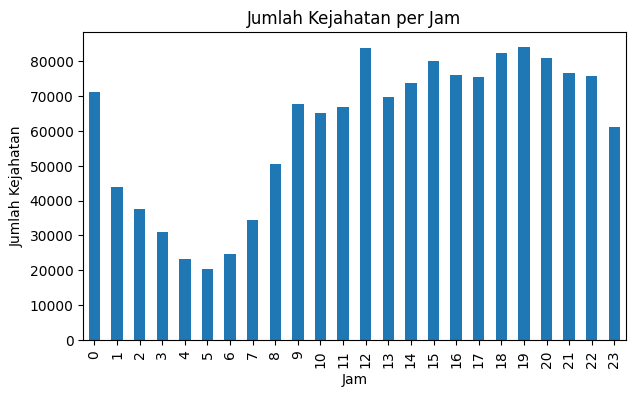

In [37]:
plt.figure(figsize=(7,4))
df.groupby('Hour').size().plot(kind='bar')
plt.title('Jumlah Kejahatan per Jam')
plt.xlabel('Jam')
plt.ylabel('Jumlah Kejahatan')
plt.show()

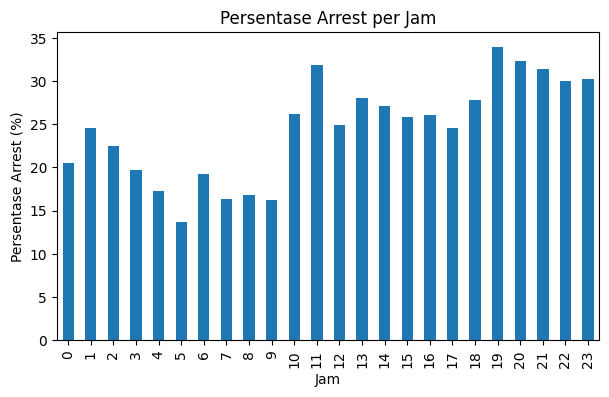

In [38]:
arrest_by_hour = df.groupby('Hour')['Arrest'].mean() * 100

plt.figure(figsize=(7,4))
arrest_by_hour.plot(kind='bar')
plt.title('Persentase Arrest per Jam')
plt.xlabel('Jam')
plt.ylabel('Persentase Arrest (%)')
plt.show()

### Analisis Spasial (Lokasi)

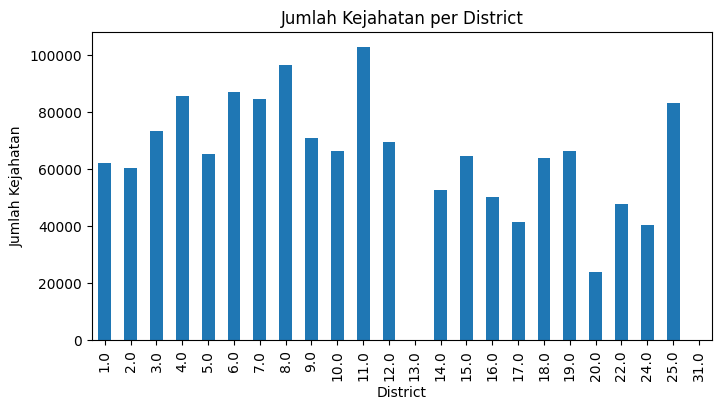

In [39]:
if 'District' in df.columns:
    dist_counts = df['District'].value_counts().sort_index()

    plt.figure(figsize=(8,4))
    dist_counts.plot(kind='bar')
    plt.title('Jumlah Kejahatan per District')
    plt.xlabel('District')
    plt.ylabel('Jumlah Kejahatan')
    plt.show()

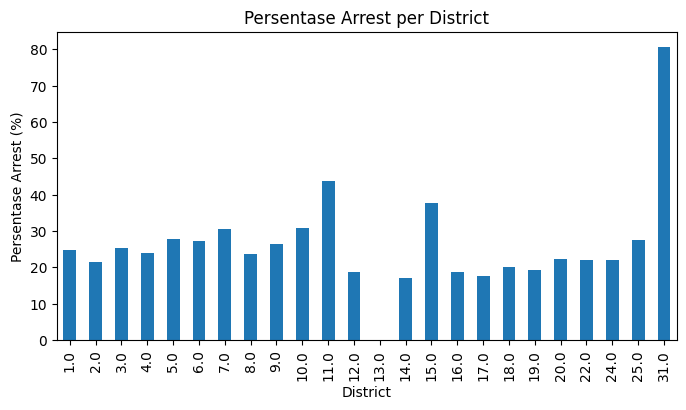

In [40]:
if 'District' in df.columns:
    arrest_by_dist = (df.groupby('District')['Arrest'].mean() * 100).sort_index()

    plt.figure(figsize=(8,4))
    arrest_by_dist.plot(kind='bar')
    plt.title('Persentase Arrest per District')
    plt.xlabel('District')
    plt.ylabel('Persentase Arrest (%)')
    plt.show()

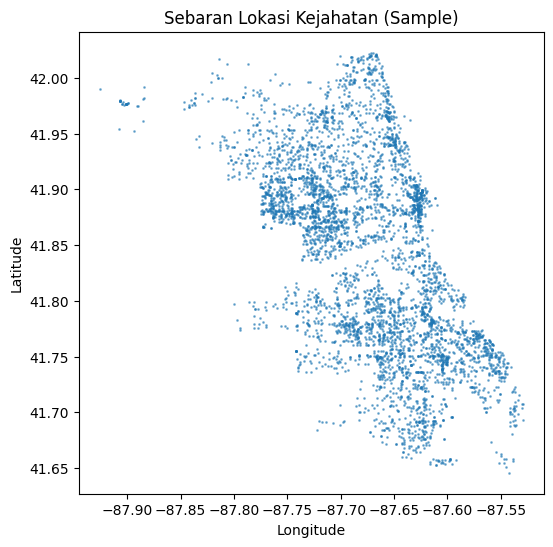

In [41]:
if {'Latitude', 'Longitude'}.issubset(df.columns):
    # Untuk meringankan, sampling sebagian data kalau sangat besar
    sample_df = df.sample(n=5000, random_state=42) if len(df) > 5000 else df

    plt.figure(figsize=(6,6))
    plt.scatter(sample_df['Longitude'], sample_df['Latitude'], s=1, alpha=0.5)
    plt.title('Sebaran Lokasi Kejahatan (Sample)')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.show()


### Korelasi & Hubungan Antar Fitur

In [42]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

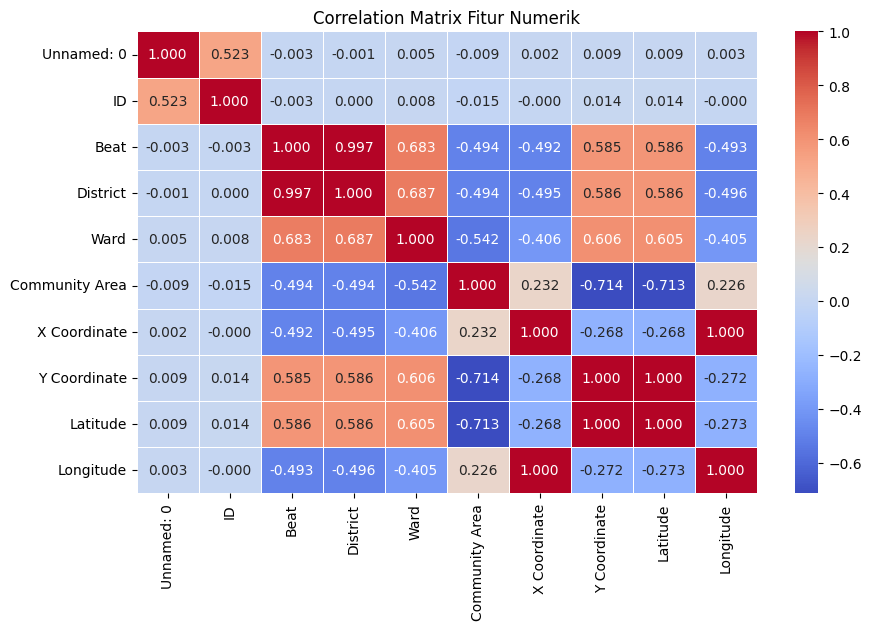

In [47]:
corr_matrix = df[numeric_cols].corr()

plt.figure(figsize=(10,6))
sns.heatmap(
    corr_matrix,
    annot=True,
    cmap='coolwarm',
    fmt=".3f",
    linewidths=0.5
)
plt.title('Correlation Matrix Fitur Numerik')
plt.show()

In [48]:
crosstab_pt_arrest = pd.crosstab(
    df['Primary Type'],
    df['Arrest'],
    normalize='index'
) * 100

display(crosstab_pt_arrest.head(10))

Arrest,False,True
Primary Type,,
ARSON,90.166892,9.833108
ASSAULT,76.614926,23.385074
BATTERY,77.056883,22.943117
BURGLARY,94.648489,5.351511
CONCEALED CARRY LICENSE VIOLATION,14.444444,85.555556
CRIM SEXUAL ASSAULT,88.143046,11.856954
CRIMINAL DAMAGE,93.461130,6.538870
CRIMINAL TRESPASS,29.759970,70.240030
DECEPTIVE PRACTICE,88.188622,11.811378


### Ringkasan & Keputusan Awal

In [50]:
summary = {}

# Ringkasan imbalance target
if 'Arrest' in df.columns:
    summary['arrest_counts'] = df['Arrest'].value_counts().to_dict()
    summary['arrest_percent'] = (df['Arrest'].value_counts(normalize=True) * 100).round(2).to_dict()

# Jumlah fitur numerik & kategorikal
summary['n_numeric_features'] = len(df.select_dtypes(include=['int64', 'float64']).columns)
summary['n_categorical_features'] = len(df.select_dtypes(include=['object', 'category']).columns)

summary

{'arrest_counts': {False: 1079242, True: 377472},
 'arrest_percent': {False: 74.09, True: 25.91},
 'n_numeric_features': 10,
 'n_categorical_features': 8}